# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import pickle
import joblib

# Loading Data

In [2]:
filename = 'Q1.csv'
df = pd.read_csv(filename)

label = df['Fault']
column=df.columns[1:-1]
features = df[column]

# EDA

(array([8404.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5443.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

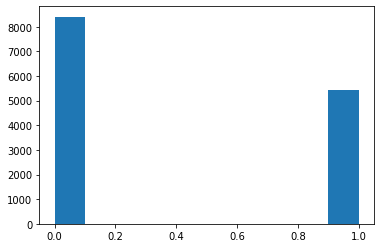

In [3]:
plt.hist(df['Fault'])

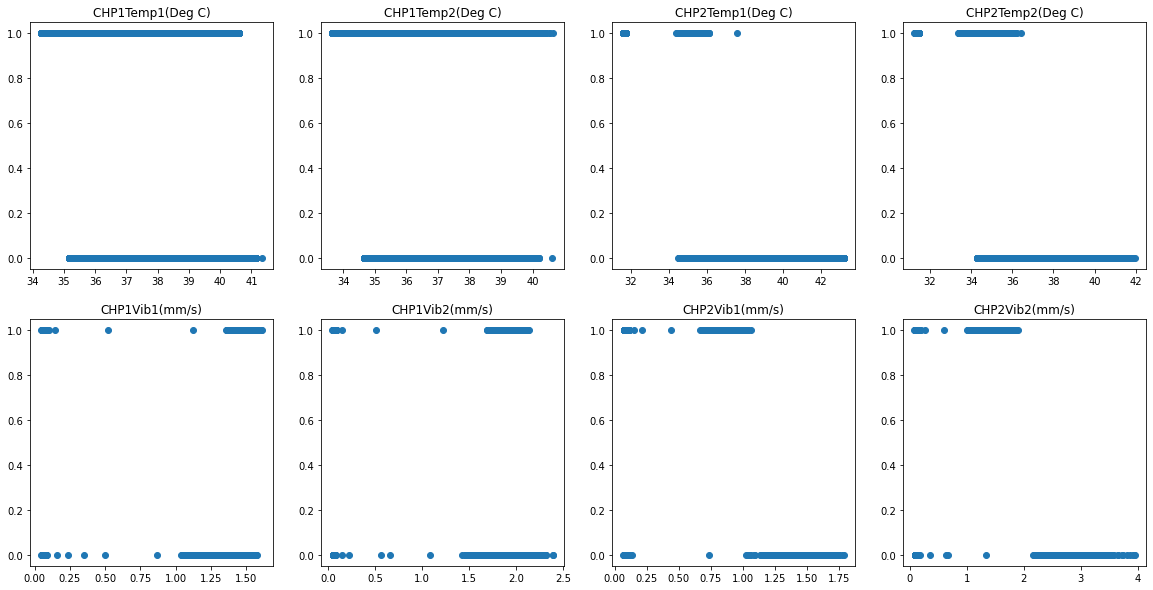

In [4]:
figure, axis = plt.subplots(2, int(len(column)/2), figsize=(20,10))
for n,ax in enumerate(axis.reshape(-1)):
  ax.scatter(df[column[n]], label)
  ax.set_title(str(column[n]))

# Training

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3)

In [5]:
RFmodel = RandomForestClassifier(n_estimators = 100, random_state=0) 
RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)
print("Predicting using RandomForest")
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

joblib.dump(RFmodel, 'RandomForest.sav')

Predicting using RandomForest
ACCURACY OF THE MODEL:  0.9995186522262335


['RandomForest.sav']

In [6]:
XGBmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
XGBmodel.fit(X_train,y_train)
y_pred = XGBmodel.predict(X_test)
print("Predicting using XGBoost")
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

joblib.dump(XGBmodel, 'XGBoost.sav')

Predicting using XGBoost
ACCURACY OF THE MODEL:  0.9995186522262335


['XGBoost.sav']

In [7]:
MLPmodel = MLPClassifier(max_iter=100, random_state=0)
MLPmodel.fit(X_train,y_train)
y_pred = MLPmodel.predict(X_test)
print("Predicting using MLP")
print("ACCURACY OF THE MODEL: ", round(metrics.accuracy_score(y_test, y_pred),5))

joblib.dump(MLPmodel, 'MLP.sav')

Predicting using MLP
ACCURACY OF THE MODEL:  0.99952


['MLP.sav']

In [9]:
%timeit y_pred = RFmodel.predict(X_test)

52.6 ms ± 6.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%timeit y_pred = XGBmodel.predict(X_test)

4.92 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%timeit y_pred = MLPmodel.predict(X_test)

6.92 ms ± 389 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Inference

In [8]:
models = ['RandomForest','XGBoost','MLP']

In [9]:
for model in models:
  filename = model+".sav"
  joblib_model= joblib.load(filename)

  score = joblib_model.score(X_test,y_test)
  print("Predicting using",model)
  print("ACCURACY OF THE MODEL: ", score)
  print()

Predicting using RandomForest
ACCURACY OF THE MODEL:  0.9995186522262335

Predicting using XGBoost
ACCURACY OF THE MODEL:  0.9995186522262335

Predicting using MLP
ACCURACY OF THE MODEL:  0.9995186522262335

